<a href="https://colab.research.google.com/github/bonareri/Credit-Risk-Assessment/blob/main/Financial_Statement_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Financial Analysis

In [130]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Define the stock symbol (e.g., Apple)
ticker = "AAPL"

# Download financial data
stock = yf.Ticker(ticker)

### Get Financial Statements

####  Income Statement

In [2]:
income_statement = stock.financials
print(income_statement)

                                                        2024-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.241   
Normalized EBITDA                                   134661000000.0   
Net Income From Continuing Operation Net Minori...   93736000000.0   
Reconciled Depreciation                              11445000000.0   
Reconciled Cost Of Revenue                          210352000000.0   
EBITDA                                              134661000000.0   
EBIT                                                123216000000.0   
Net Interest Income                                            NaN   
Interest Expense                                               NaN   
Interest Income                                                NaN   
Normalized Income                                    93736000000.0   
Net Income From Continuing And Discontinued Ope...   93736000000.0   
Total Expenses      

####  Balance Sheet

In [3]:
balance_sheet = stock.balance_sheet
print(balance_sheet)

                                                      2024-09-30  \
Treasury Shares Number                                       NaN   
Ordinary Shares Number                             15116786000.0   
Share Issued                                       15116786000.0   
Net Debt                                           76686000000.0   
Total Debt                                        106629000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments   65171000000.0   
Other Short Term Investments                       35228000000.0   
Cash And Cash Equivalents                          29943000000.0   
Cash Equivalents                                    2744000000.0   
Cash Financial                                     27199000000.0   

                                                      2023-09-30  \
Treasury Shares Number                                       0.0   
Ordinary Shares Number                         

#### Cash Flow Statement

In [4]:
cash_flow = stock.cashflow
print(cash_flow)

                                                    2024-09-30  \
Free Cash Flow                                  108807000000.0   
Repurchase Of Capital Stock                     -94949000000.0   
Repayment Of Debt                                -9958000000.0   
Issuance Of Debt                                           0.0   
Issuance Of Capital Stock                                  NaN   
Capital Expenditure                              -9447000000.0   
Interest Paid Supplemental Data                            NaN   
Income Tax Paid Supplemental Data                26102000000.0   
End Cash Position                                29943000000.0   
Beginning Cash Position                          30737000000.0   
Changes In Cash                                   -794000000.0   
Financing Cash Flow                            -121983000000.0   
Cash Flow From Continuing Financing Activities -121983000000.0   
Net Other Financing Charges                      -5802000000.0   
Cash Divid

### Key Financial Ratios

#### Market Capitalization, P/E Ratio, and Dividend Yield

In [5]:
market_cap = stock.info['marketCap']
pe_ratio = stock.info['trailingPE']
dividend_yield = stock.info['dividendYield']

print(f"Market Cap: {market_cap}")
print(f"P/E Ratio: {pe_ratio}")
print(f"Dividend Yield: {dividend_yield}")

Market Cap: 3591333740544
P/E Ratio: 37.88748
Dividend Yield: 0.42


### Export Data to Excel for Analysis

In [6]:
# Save financial statements to Excel
with pd.ExcelWriter("financial_statements.xlsx") as writer:
    income_statement.to_excel(writer, sheet_name="Income Statement")
    balance_sheet.to_excel(writer, sheet_name="Balance Sheet")
    cash_flow.to_excel(writer, sheet_name="Cash Flow")

### Load Data

In [72]:
# Load the Excel file and read the required sheets
sheets = pd.read_excel("financial_statements.xlsx", sheet_name=['Income Statement', 'Balance Sheet', 'Cash Flow'])

# Display sheet names
print(xls.sheet_names)

['Income Statement', 'Balance Sheet', 'Cash Flow']


In [73]:
# Extract individual sheets
income_df = sheets['Income Statement']
balance_df = sheets['Balance Sheet']
cash_flow_df = sheets['Cash Flow']

In [77]:
income_df.head()    # View first 5 rows of Income Statement

,Unnamed: 0,2024-09-30 00:00:00,2023-09-30 00:00:00,2022-09-30 00:00:00,2021-09-30 00:00:00,2020-09-30 00:00:00
0,Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
1,Tax Rate For Calcs,2.410000e-01,1.470000e-01,1.620000e-01,1.330000e-01,NaN
2,Normalized EBITDA,1.346610e+11,1.258200e+11,1.305410e+11,1.231360e+11,NaN
3,Net Income From Continuing Operation Net Minor...,9.373600e+10,9.699500e+10,9.980300e+10,9.468000e+10,NaN
4,Reconciled Depreciation,1.144500e+10,1.151900e+10,1.110400e+10,1.128400e+10,NaN


In [78]:
balance_df.head()     # View first 5 rows of Balance Sheet

,Unnamed: 0,2024-09-30 00:00:00,2023-09-30 00:00:00,2022-09-30 00:00:00,2021-09-30 00:00:00,2020-09-30 00:00:00
0,Treasury Shares Number,NaN,0.000000e+00,NaN,NaN,NaN
1,Ordinary Shares Number,1.511679e+10,1.555006e+10,1.594342e+10,1.642679e+10,NaN
2,Share Issued,1.511679e+10,1.555006e+10,1.594342e+10,1.642679e+10,NaN
3,Net Debt,7.668600e+10,8.112300e+10,9.642300e+10,8.977900e+10,NaN
4,Total Debt,1.066290e+11,1.110880e+11,1.324800e+11,1.365220e+11,NaN


In [79]:
cash_flow_df.head()   # View first 5 rows of Cash Flow

,Unnamed: 0,2024-09-30 00:00:00,2023-09-30 00:00:00,2022-09-30 00:00:00,2021-09-30 00:00:00,2020-09-30 00:00:00
0,Free Cash Flow,1.088070e+11,9.958400e+10,1.114430e+11,92953000000,NaN
1,Repurchase Of Capital Stock,-9.494900e+10,-7.755000e+10,-8.940200e+10,-85971000000,NaN
2,Repayment Of Debt,-9.958000e+09,-1.115100e+10,-9.543000e+09,-8750000000,NaN
3,Issuance Of Debt,0.000000e+00,5.228000e+09,5.465000e+09,20393000000,NaN
4,Issuance Of Capital Stock,NaN,NaN,NaN,1105000000,880000000.0


In [80]:
print(income_df.info())
print(balance_df.info())
print(cash_flow_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           39 non-null     object 
 1   2024-09-30 00:00:00  33 non-null     float64
 2   2023-09-30 00:00:00  39 non-null     float64
 3   2022-09-30 00:00:00  39 non-null     float64
 4   2021-09-30 00:00:00  39 non-null     float64
 5   2020-09-30 00:00:00  6 non-null      float64
dtypes: float64(5), object(1)
memory usage: 2.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           68 non-null     object 
 1   2024-09-30 00:00:00  62 non-null     float64
 2   2023-09-30 00:00:00  67 non-null     float64
 3   2022-09-30 00:00:00  67 non-null     float64
 4   2021-09-30 00:00:00  63 non-null  

### Key Observations from:
- Column Naming Issues: The first column (Unnamed: 0) should be renamed to "Metric" for better readability.
- Date Formatting: The column names are datetime objects. They should be formatted as years (e.g., 2024, 2023, etc.).

Missing Values:
- The 2020 column has very few non-null values across all sheets. It might not be useful and could be removed.
Other columns (e.g., 2024-09-30 00:00:00) have some missing values.

## Data Cleaning

In [85]:
# Rename first column if it exists
for df in [income_df, balance_df, cash_flow_df]:
    if df.columns[0].startswith('Unnamed'):  # Ensures we only rename if it's unnamed
        df.rename(columns={df.columns[0]: 'Metric'}, inplace=True)

# Convert datetime columns to year format
for df in [income_df, balance_df, cash_flow_df]:
    df.columns = [str(pd.to_datetime(col).year) if '00:00:00' in str(col) else col for col in df.columns]

# Drop the 2020 column if it has too many missing values
for df in [income_df, balance_df, cash_flow_df]:
    if '2020' in df.columns and df['2020'].count() < len(df) * 0.2:  # Less than 20% filled
        df.drop(columns=['2020'], inplace=True)

# Check the updated column names
print(income_df.head())
print(balance_df.head())
print(cash_flow_df.head())

                                              Metric          2024  \
0                        Tax Effect Of Unusual Items  0.000000e+00   
1                                 Tax Rate For Calcs  2.410000e-01   
2                                  Normalized EBITDA  1.346610e+11   
3  Net Income From Continuing Operation Net Minor...  9.373600e+10   
4                            Reconciled Depreciation  1.144500e+10   

           2023          2022          2021  
0  0.000000e+00  0.000000e+00  0.000000e+00  
1  1.470000e-01  1.620000e-01  1.330000e-01  
2  1.258200e+11  1.305410e+11  1.231360e+11  
3  9.699500e+10  9.980300e+10  9.468000e+10  
4  1.151900e+10  1.110400e+10  1.128400e+10  
                   Metric          2024          2023          2022  \
0  Treasury Shares Number           NaN  0.000000e+00           NaN   
1  Ordinary Shares Number  1.511679e+10  1.555006e+10  1.594342e+10   
2            Share Issued  1.511679e+10  1.555006e+10  1.594342e+10   
3                Ne

In [86]:
print(income_df.info())
print(balance_df.info())
print(cash_flow_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Metric  39 non-null     object 
 1   2024    33 non-null     float64
 2   2023    39 non-null     float64
 3   2022    39 non-null     float64
 4   2021    39 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Metric  68 non-null     object 
 1   2024    62 non-null     float64
 2   2023    67 non-null     float64
 3   2022    67 non-null     float64
 4   2021    63 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  ------------

In [87]:
# Display rows with missing values for each sheet
print("Rows with missing values in Income Statement:")
print(income_df[income_df.isnull().any(axis=1)])

print("\nRows with missing values in Balance Sheet:")
print(balance_df[balance_df.isnull().any(axis=1)])

print("\nRows with missing values in Cash Flow:")
print(cash_flow_df[cash_flow_df.isnull().any(axis=1)])

Rows with missing values in Income Statement:
                                       Metric  2024          2023  \
8                         Net Interest Income   NaN -1.830000e+08   
9                            Interest Expense   NaN  3.933000e+09   
10                            Interest Income   NaN  3.750000e+09   
28  Net Non Operating Interest Income Expense   NaN -1.830000e+08   
29             Interest Expense Non Operating   NaN  3.933000e+09   
30              Interest Income Non Operating   NaN  3.750000e+09   

            2022          2021  
8  -1.060000e+08  1.980000e+08  
9   2.931000e+09  2.645000e+09  
10  2.825000e+09  2.843000e+09  
28 -1.060000e+08  1.980000e+08  
29  2.931000e+09  2.645000e+09  
30  2.825000e+09  2.843000e+09  

Rows with missing values in Balance Sheet:
                                Metric          2024          2023  \
0               Treasury Shares Number           NaN  0.000000e+00   
9            Capital Lease Obligations           NaN  1

### Handling Missing Values in Financial Statements

#### 1. Income Statement

- The missing values in 2024 exist while past years have data.
- To maintain consistency, I will use forward fill (ffill) for missing values in 2024, assuming continuity.
- If a forward fill is not applicable, I will use mean imputation based on previous years.

In [89]:
income_df['2024'] = income_df['2024'].ffill()

In [90]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Metric  39 non-null     object 
 1   2024    39 non-null     float64
 2   2023    39 non-null     float64
 3   2022    39 non-null     float64
 4   2021    39 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.7+ KB


#### 2. Balance Sheet

- Some columns (e.g., Treasury Shares Number, Other Investments) have missing values across multiple years. These will be dropped if irrelevant.
- Missing values for Capital Lease Obligations & Tax Payables (2024) will be forward filled from 2023.
- Non-Current Deferred Assets & Taxes are missing in 2021 but available in later years. These will be backward filled to ensure continuity.

In [96]:
print(balance_df.columns)

Index(['Metric', '2024', '2023', '2022', '2021'], dtype='object')


In [97]:
print(balance_df['Metric'].unique())

['Treasury Shares Number' 'Ordinary Shares Number' 'Share Issued'
 'Net Debt' 'Total Debt' 'Tangible Book Value' 'Invested Capital'
 'Working Capital' 'Net Tangible Assets' 'Capital Lease Obligations'
 'Common Stock Equity' 'Total Capitalization'
 'Total Equity Gross Minority Interest' 'Stockholders Equity'
 'Gains Losses Not Affecting Retained Earnings' 'Other Equity Adjustments'
 'Retained Earnings' 'Capital Stock' 'Common Stock'
 'Total Liabilities Net Minority Interest'
 'Total Non Current Liabilities Net Minority Interest'
 'Other Non Current Liabilities' 'Tradeand Other Payables Non Current'
 'Long Term Debt And Capital Lease Obligation'
 'Long Term Capital Lease Obligation' 'Long Term Debt'
 'Current Liabilities' 'Other Current Liabilities'
 'Current Deferred Liabilities' 'Current Deferred Revenue'
 'Current Debt And Capital Lease Obligation'
 'Current Capital Lease Obligation' 'Current Debt'
 'Other Current Borrowings' 'Commercial Paper'
 'Payables And Accrued Expenses' 'Payabl

In [98]:
# Define rows to forward-fill for 2024
rows_to_ffill = ['Capital Lease Obligations', 'Total Tax Payable', 'Income Tax Payable']

for row in rows_to_ffill:
    balance_df.loc[balance_df['Metric'] == row, '2024'] = (
        balance_df.loc[balance_df['Metric'] == row, '2024'].ffill(axis=0)
    )

In [99]:
balance_df = balance_df[~balance_df['Metric'].isin(['Treasury Shares Number'])]

In [100]:
balance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 1 to 67
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Metric  67 non-null     object 
 1   2024    62 non-null     float64
 2   2023    66 non-null     float64
 3   2022    67 non-null     float64
 4   2021    63 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.1+ KB


In [101]:
missing_rows = balance_df[balance_df.isnull().any(axis=1)]
print(missing_rows)

                                Metric          2024          2023  \
9            Capital Lease Obligations           NaN  1.284200e+10   
24  Long Term Capital Lease Obligation           NaN  1.126700e+10   
31    Current Capital Lease Obligation           NaN  1.575000e+09   
37                   Total Tax Payable  2.660100e+10  8.819000e+09   
38                  Income Tax Payable  2.660100e+10  8.819000e+09   
43         Non Current Deferred Assets  1.949900e+10  1.785200e+10   
44   Non Current Deferred Taxes Assets  1.949900e+10  1.785200e+10   
46                   Other Investments           NaN           NaN   
53                    Other Properties           NaN  1.066100e+10   

            2022          2021  
9   1.241100e+10  1.180300e+10  
24  1.074800e+10  1.027500e+10  
31  1.663000e+09  1.528000e+09  
37  6.552000e+09           NaN  
38  6.552000e+09           NaN  
43  1.537500e+10           NaN  
44  1.537500e+10           NaN  
46  1.208050e+11  1.278770e+11  
53

In [102]:
# Forward Fill for missing 2024 values using 2023
columns_to_ffill = ['Capital Lease Obligations', 'Long Term Capital Lease Obligation',
                    'Current Capital Lease Obligation', 'Total Tax Payable', 'Income Tax Payable']

balance_df.loc[balance_df['Metric'].isin(columns_to_ffill), '2024'] = (
    balance_df.loc[balance_df['Metric'].isin(columns_to_ffill), '2024']
    .fillna(balance_df['2023'])
)

# Backward Fill for Non Current Deferred Assets & Taxes
columns_to_bfill = ['Non Current Deferred Assets', 'Non Current Deferred Taxes Assets']
balance_df.loc[balance_df['Metric'].isin(columns_to_bfill), '2021'] = (
    balance_df.loc[balance_df['Metric'].isin(columns_to_bfill), '2021']
    .fillna(balance_df['2022'])
)

# Drop "Other Investments" if it's mostly missing
balance_df = balance_df[balance_df['Metric'] != 'Other Investments']

# Print cleaned data
print(balance_df.loc[balance_df.isnull().any(axis=1)])  # Check if any missing values remain

                Metric          2024          2023          2022          2021
37   Total Tax Payable  2.660100e+10  8.819000e+09  6.552000e+09           NaN
38  Income Tax Payable  2.660100e+10  8.819000e+09  6.552000e+09           NaN
53    Other Properties           NaN  1.066100e+10  1.041700e+10  1.008700e+10


In [103]:
# Backfill missing 2021 values for Tax Payables
tax_columns = ['Total Tax Payable', 'Income Tax Payable']
balance_df.loc[balance_df['Metric'].isin(tax_columns), '2021'] = (
    balance_df.loc[balance_df['Metric'].isin(tax_columns), '2021']
    .fillna(balance_df['2022'])
)

# Forward fill for Other Properties in 2024
balance_df.loc[balance_df['Metric'] == 'Other Properties', '2024'] = (
    balance_df.loc[balance_df['Metric'] == 'Other Properties', '2024']
    .fillna(balance_df['2023'])
)

# Check if missing values remain
print(balance_df.loc[balance_df.isnull().any(axis=1)])

Empty DataFrame
Columns: [Metric, 2024, 2023, 2022, 2021]
Index: []


In [104]:
balance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 1 to 67
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Metric  66 non-null     object 
 1   2024    66 non-null     float64
 2   2023    66 non-null     float64
 3   2022    66 non-null     float64
 4   2021    66 non-null     float64
dtypes: float64(4), object(1)
memory usage: 5.1+ KB


#### 3. Cash Flow Statement

- Some missing values (e.g., Stock Issuance, Business Purchases, Deferred Taxes) are highly variable and do not occur every year.
- For these, I will fill missing values with 0, assuming no transaction happened.
- For 2024-specific missing values, I will use forward fill from 2023 where trends exist.

In [106]:
# Display rows with any missing values
missing_values_df = cash_flow_df[cash_flow_df.isnull().any(axis=1)]
print(missing_values_df)

                             Metric  2024          2023          2022  \
4         Issuance Of Capital Stock   NaN           NaN           NaN   
6   Interest Paid Supplemental Data   NaN  3.803000e+09  2.865000e+09   
18            Common Stock Issuance   NaN           NaN           NaN   
30   Net Business Purchase And Sale   NaN           NaN -3.060000e+08   
31             Purchase Of Business   NaN           NaN -3.060000e+08   
37  Change In Other Working Capital   NaN           NaN  4.780000e+08   
48                     Deferred Tax   NaN           NaN  8.950000e+08   
49              Deferred Income Tax   NaN           NaN  8.950000e+08   

          2021  
4   1105000000  
6   2687000000  
18  1105000000  
30   -33000000  
31   -33000000  
37  1676000000  
48 -4774000000  
49 -4774000000  


In [110]:
# Fill missing values with 0 where transactions do not occur every year
cash_flow_df.fillna(0, inplace=True)

# Forward fill only for the 2024 column where trends exist
cash_flow_df['2024'] = cash_flow_df['2024'].replace(0, np.nan).ffill()

In [113]:
cash_flow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Metric  53 non-null     object 
 1   2024    53 non-null     float64
 2   2023    53 non-null     float64
 3   2022    53 non-null     float64
 4   2021    53 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.2+ KB


In [114]:
#save cleaned data
with pd.ExcelWriter("cleaned_financial_statements.xlsx") as writer:
    income_df.to_excel(writer, sheet_name="Income Statement")
    balance_df.to_excel(writer, sheet_name="Balance Sheet")
    cash_flow_df.to_excel(writer, sheet_name="Cash Flow")

## Financial Metrics & Ratios

### a) Liquidity Ratios (Short-term financial health)
These measure the company's ability to cover short-term liabilities.

1.  Current Ratio = Current Assets / Current Liabilities
- Interpretation: If the ratio is >1, the company can cover short-term debts.

In [116]:
current_assets = balance_df.loc[balance_df['Metric'] == 'Current Assets', '2024'].values[0]
current_liabilities = balance_df.loc[balance_df['Metric'] == 'Current Liabilities', '2024'].values[0]

current_ratio = current_assets / current_liabilities
print(f"Current Ratio (2024): {current_ratio:.2f}")

Current Ratio (2024): 0.87


2. Quick Ratio = (Current Assets - Inventory) / Current Liabilities

- Interpretation: A higher quick ratio means strong liquidity.

In [117]:
inventory = balance_df.loc[balance_df['Metric'] == 'Inventory', '2024'].values[0]

quick_ratio = (current_assets - inventory) / current_liabilities
print(f"Quick Ratio (2024): {quick_ratio:.2f}")

Quick Ratio (2024): 0.83


### b) Profitability Ratios (Earnings Performance)
These evaluate how well a company generates profit.

1️⃣ Gross Profit Margin = (Revenue - Cost of Goods Sold) / Revenue

In [120]:
revenue = income_df.loc[income_df['Metric'] == 'Total Revenue', '2024'].values[0]
cogs = income_df.loc[income_df['Metric'] == 'Cost Of Revenue', '2024'].values[0]

gross_profit_margin = (revenue - cogs) / revenue
print(f"Gross Profit Margin (2024): {gross_profit_margin:.2%}")

Gross Profit Margin (2024): 46.21%


2️⃣ Net Profit Margin = Net Income / Revenue

In [121]:
net_income = income_df.loc[income_df['Metric'] == 'Net Income', '2024'].values[0]

net_profit_margin = net_income / revenue
print(f"Net Profit Margin (2024): {net_profit_margin:.2%}")

Net Profit Margin (2024): 23.97%


### c) Leverage Ratios (Debt vs Equity)
These show how much debt a company is using.

1️⃣ Debt-to-Equity Ratio = Total Liabilities / Shareholders’ Equity

In [122]:
total_liabilities = balance_df.loc[balance_df['Metric'] == 'Total Liabilities Net Minority Interest', '2024'].values[0]
equity = balance_df.loc[balance_df['Metric'] == 'Stockholders Equity', '2024'].values[0]

debt_equity_ratio = total_liabilities / equity
print(f"Debt-to-Equity Ratio (2024): {debt_equity_ratio:.2f}")

Debt-to-Equity Ratio (2024): 5.41


## 3. Cash Flow Analysis
1️⃣ Operating Cash Flow Trend

Look at Cash from Operations for multiple years.

In [125]:
print(cash_flow_df['Metric'].unique())

['Free Cash Flow' 'Repurchase Of Capital Stock' 'Repayment Of Debt'
 'Issuance Of Debt' 'Issuance Of Capital Stock' 'Capital Expenditure'
 'Interest Paid Supplemental Data' 'Income Tax Paid Supplemental Data'
 'End Cash Position' 'Beginning Cash Position' 'Changes In Cash'
 'Financing Cash Flow' 'Cash Flow From Continuing Financing Activities'
 'Net Other Financing Charges' 'Cash Dividends Paid'
 'Common Stock Dividend Paid' 'Net Common Stock Issuance'
 'Common Stock Payments' 'Common Stock Issuance'
 'Net Issuance Payments Of Debt' 'Net Short Term Debt Issuance'
 'Net Long Term Debt Issuance' 'Long Term Debt Payments'
 'Long Term Debt Issuance' 'Investing Cash Flow'
 'Cash Flow From Continuing Investing Activities'
 'Net Other Investing Changes' 'Net Investment Purchase And Sale'
 'Sale Of Investment' 'Purchase Of Investment'
 'Net Business Purchase And Sale' 'Purchase Of Business'
 'Net PPE Purchase And Sale' 'Purchase Of PPE' 'Operating Cash Flow'
 'Cash Flow From Continuing Operati

In [126]:
cash_ops = cash_flow_df.loc[cash_flow_df['Metric'] == 'Operating Cash Flow']
print(cash_ops)

                 Metric          2024          2023          2022  \
34  Operating Cash Flow  1.182540e+11  1.105430e+11  1.221510e+11   

            2021  
34  104038000000  


2️⃣ Free Cash Flow (FCF) = Operating Cash Flow - Capital Expenditures

In [127]:
capex = cash_flow_df.loc[cash_flow_df['Metric'] == 'Capital Expenditure', '2024'].values[0]
operating_cash = cash_flow_df.loc[cash_flow_df['Metric'] == 'Operating Cash Flow', '2024'].values[0]

free_cash_flow = operating_cash - capex
print(f"Free Cash Flow (2024): {free_cash_flow}")

Free Cash Flow (2024): 127701000000.0


## 4. Visualization


### 📊 Revenue & Net Income Trend

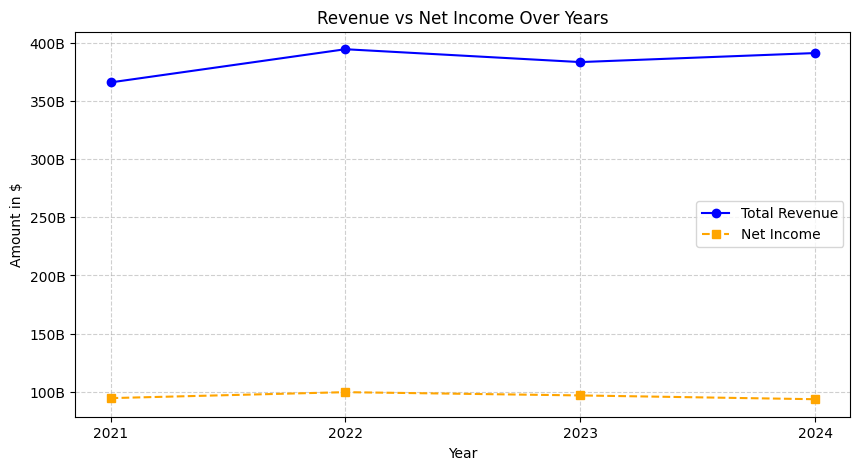

In [135]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 5))

# Plot revenue and net income
plt.plot(years, revenues, marker='o', label='Total Revenue', color='blue')
plt.plot(years, net_income, marker='s', linestyle='--', label='Net Income', color='orange')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Amount in $')
plt.title('Revenue vs Net Income Over Years')

# Format Y-axis to display values in billions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e9:.0f}B'))

# Grid, legend, and display
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

### Insights from Revenue vs. Net Income Graph

**1. Revenue Trend**
- The total revenue shows a **general upward trend**, peaking in **2022**, followed by a slight dip in **2023**, and then recovering in **2024**.
- This suggests **strong business performance** with minor fluctuations.
- The small decline in 2023 might indicate external economic factors, operational inefficiencies, or increased costs.

**2. Net Income Trend**
- Net income remains **relatively stable** compared to revenue, showing only slight variations.
- This suggests that **profitability is consistent** despite revenue changes.
- The gap between revenue and net income indicates that **operating expenses, taxes, or other costs** play a significant role in determining net profit.

**3. Revenue vs. Net Income Scale Difference**
- Revenue is **significantly higher** than net income.
- This highlights that while the company generates **high revenue**, profitability is only a **fraction** of that.
- The trend could be influenced by factors like **cost of goods sold (COGS), operating expenses, and investments in growth**.


